###### `Data visualization` 
is an important skill that is used in many parts of the data analysis process. 


###### `Exploratory data visualization`
generally occurs during and after the data wrangling process, and is the main method that you will use to understand the patterns and relationships present in your data. This understanding will help you approach any `statistical analyses` and will help you build conclusions and findings. This process might also illuminate additional data cleaning tasks to be performed. 

##### Step 1: Exploring Data:

##### Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob
import os

plt.rcParams['figure.figsize'] = [14, 8]

### Data Wrangling:
##### 1.1 Importing Data

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

###### There are fordgobike trips in the dataset with 16 specifications 
`duration_sec`, `start_time`, `end_time`, `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude` ,`end_station_longitude`, `bike_id, user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`. Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type. (Kaggle)

---------

-----------------

###### 1.2 Data Cleaning and Preparing:

- fixing data types:

In [4]:
# make a copy of the dataframe 
# fix multiple fields dtype
df['start_time'] = pd.to_datetime(df.start_time)
df['end_time'] = pd.to_datetime(df.end_time)

In [5]:
df.user_type  = df.user_type.astype('category')

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['member_gender'] = df['member_gender'].astype('category')

----

- adding new columns:
`start_date`, `start_hour_day`, `start_day_week`, `start_month`, `year`, `end_hour_day`, `member_age` and `duration_minute`

In [6]:
df['start_date'] = df.start_time.dt.strftime('%Y-%m-%d')
df['start_hour_day'] = df.start_time.dt.strftime('%H')
df['start_day_week'] = df.start_time.dt.strftime('%A')
df['start_month'] =  df.start_time.dt.strftime('%B')
df['year'] = df.start_time.dt.strftime('%Y')
df['duration_minute'] = df['duration_sec'] / 60

----


- fixing types again

In [7]:
df['end_hour_day'] = df.end_time.dt.strftime('%H')
df['member_age'] = 2021 - df['member_birth_year']

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_category = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_day_week'] = df['start_day_week'].astype(weekday_category)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_category = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_month'] = df['start_month'].astype(month_category)

In [8]:
customers = df.query('user_type == "Customer"')
subscribers = df.query('user_type == "Subscriber"')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_date,start_hour_day,start_day_week,start_month,year,duration_minute,end_hour_day,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,2019-02-28,17,Thursday,February,2019,869.750000,08,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,No,2019-02-28,18,Thursday,February,2019,708.683333,06,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,2019-02-28,12,Thursday,February,2019,1030.900000,05,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,2019-02-28,17,Thursday,February,2019,608.166667,04,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,2019-02-28,23,Thursday,February,2019,26.416667,00,47.0


Dropping `Nan` category for the member gender

In [11]:
df['member_gender'] = df['member_gender'].dropna()

----




###### Now I've fixed all data types i wanted, and added new features that i'll build upon during the visualization proccess.

-----
###### Step 2. Visualization:
---

##### 2.1 Univariate Visualization:

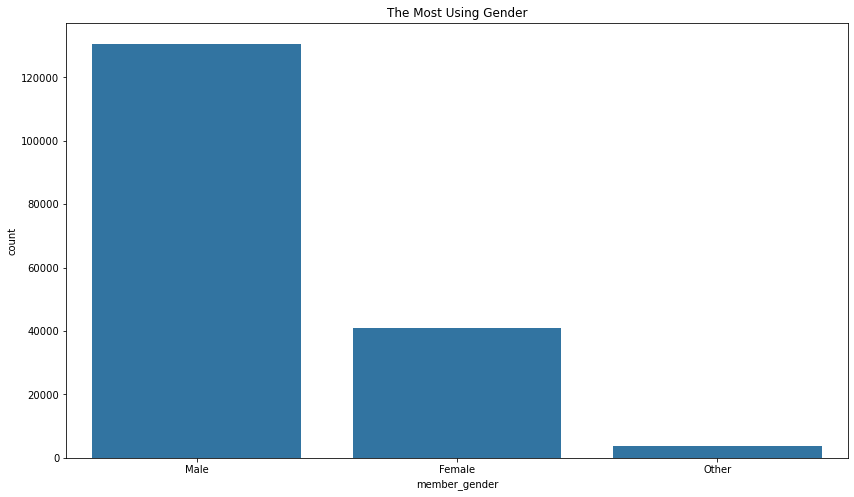

In [12]:
base_color = sb.color_palette()[0]
order_index = df.member_gender.value_counts().index

sb.countplot(data=df, x='member_gender', color=base_color, order = order_index)
plt.title('The Most Using Gender');

- it Appears that males have the dominant ratio of the Members Gender for the users of the Bike Sharing System.
---

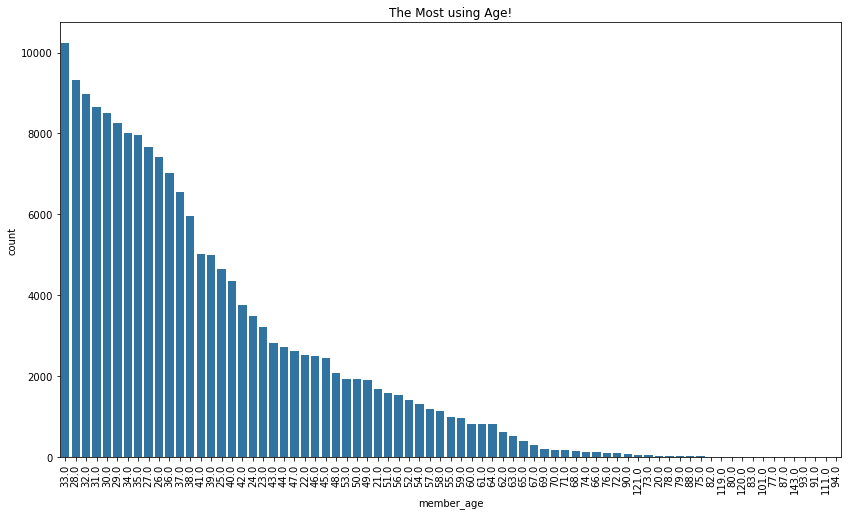

In [13]:
sb.countplot(data=df, x='member_age', color=base_color, order = df.member_age.value_counts().index)
plt.xticks(rotation = 90)
plt.title('The Most using Age!');

- people who are 33 years old are using the system more than any one else!

-------------------

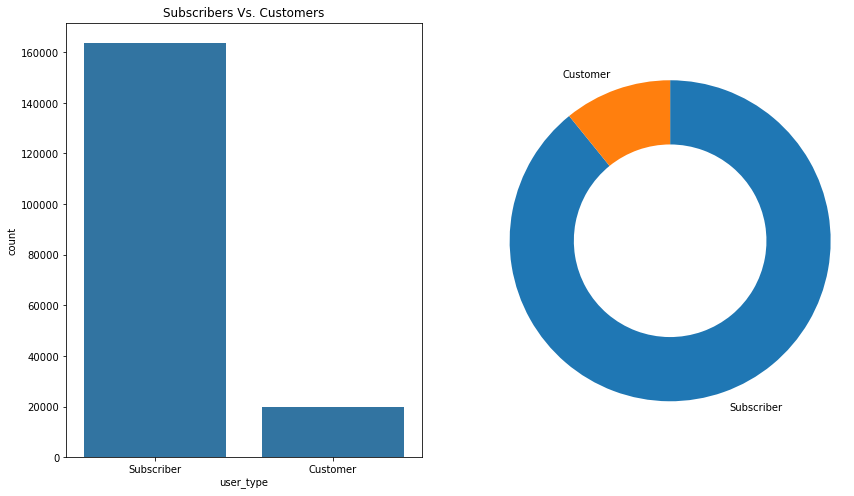

In [14]:
plt.subplot(1,2,1)
sb.countplot(data=df, x='user_type', color=base_color, order = df.user_type.value_counts().index)
plt.title('Subscribers Vs. Customers');

plt.subplot(1,2,2)
sorted_counts = df['user_type'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');

- Subscribers are the most users of the system!

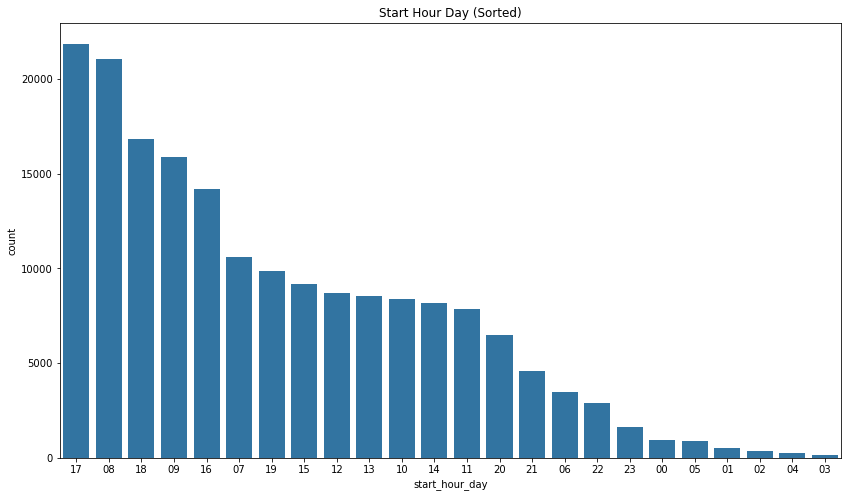

In [15]:
sb.countplot(data=df, x='start_hour_day', color=base_color, order = df.start_hour_day.value_counts().index)
plt.title('Start Hour Day (Sorted)');

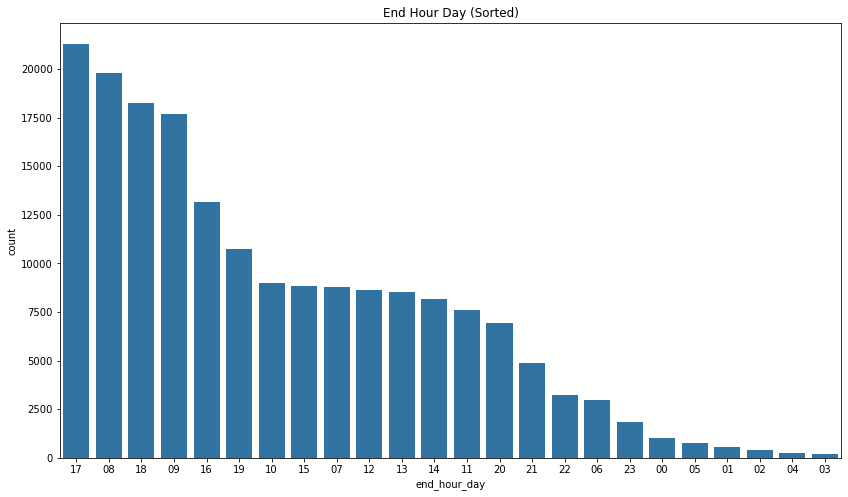

In [16]:
sb.countplot(data=df, x='end_hour_day', color=base_color, order = df.end_hour_day.value_counts().index)
plt.title('End Hour Day (Sorted)');

- Most users are registering on the system between 8 AM and 5 PM, Who is using the system by then?

---

Text(0.5, 1.0, 'Start Day Week')

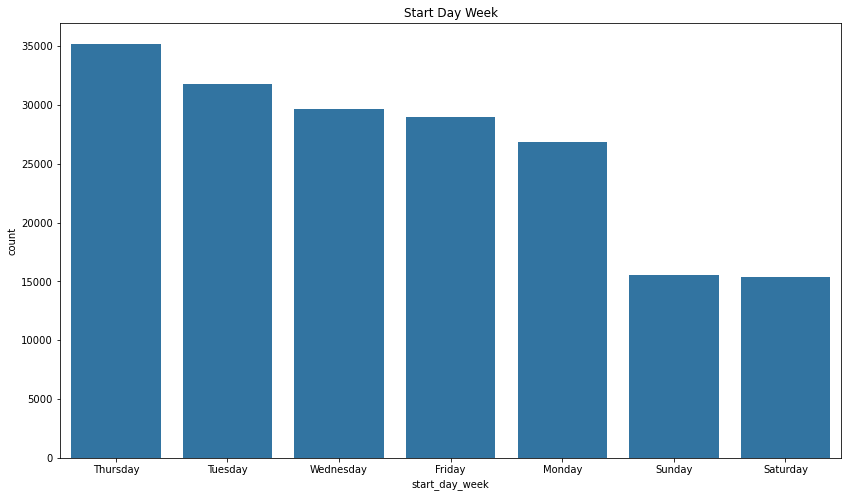

In [17]:
sb.countplot(data= df, x = 'start_day_week', color = base_color, order=df.start_day_week.value_counts().index);
plt.title('Start Day Week')

- Thursday is the most day that the system starts its work at!
----

In [18]:
(df['start_station_name'].value_counts() > 50).index

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'Powell St BART Station (Market St at 5th St)', 'Howard St at Beale St',
       'Steuart St at Market St',
       ...
       '23rd Ave at Foothill Blvd', 'Farnam St at Fruitvale Ave',
       'Leavenworth St at Broadway', 'Backesto Park (Jackson St at 13th St)',
       'Taylor St at 9th St', 'Willow St at Vine St',
       'Parker Ave at McAllister St', 'Palm St at Willow St',
       '21st Ave at International Blvd', '16th St Depot'],
      dtype='object', length=329)

-------- 

###### 2.2 Bivariate Visualization:

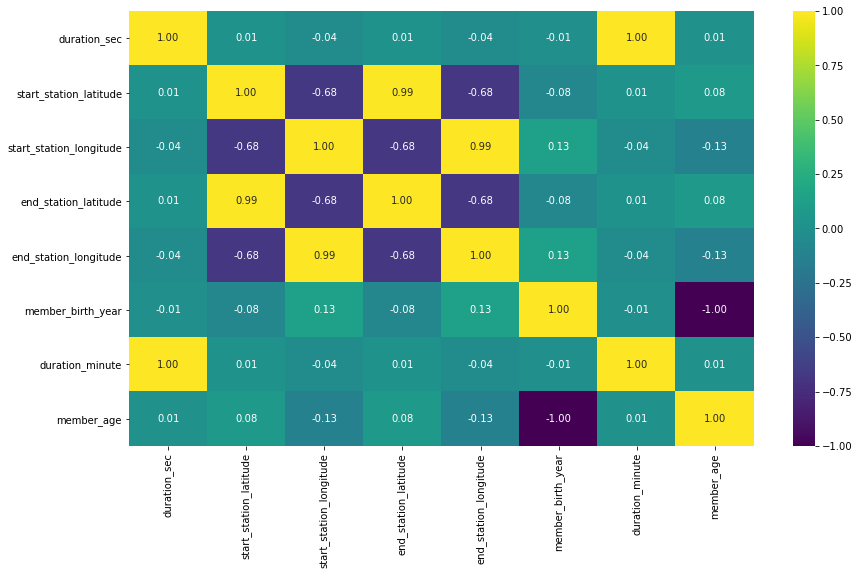

In [19]:
sb.heatmap(df.corr(), annot=True, cmap='viridis', fmt='0.2f');

- Looking for Correlation amongst features!
----


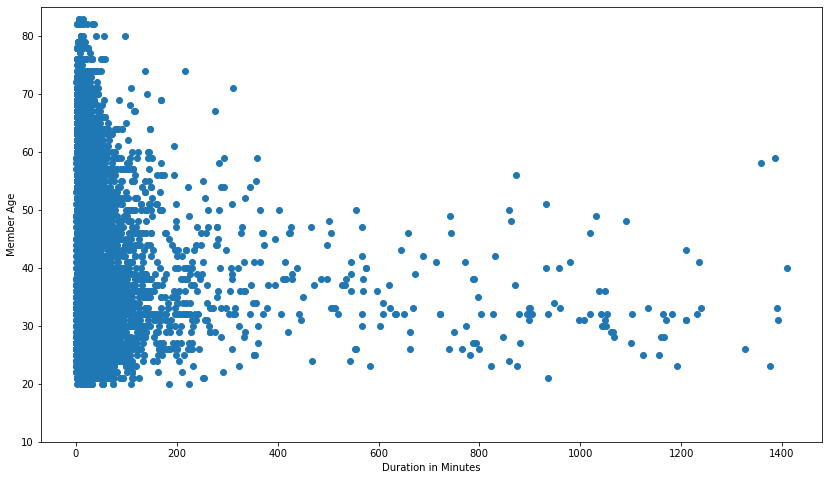

In [20]:
plt.scatter(data=df, x='duration_minute', y='member_age')
plt.xlabel("Duration in Minutes")
plt.ylabel("Member Age")
plt.ylim([10,85]);

- The Visualization shows that most member are using the system from 0 to 200 minutes more than else!

-----

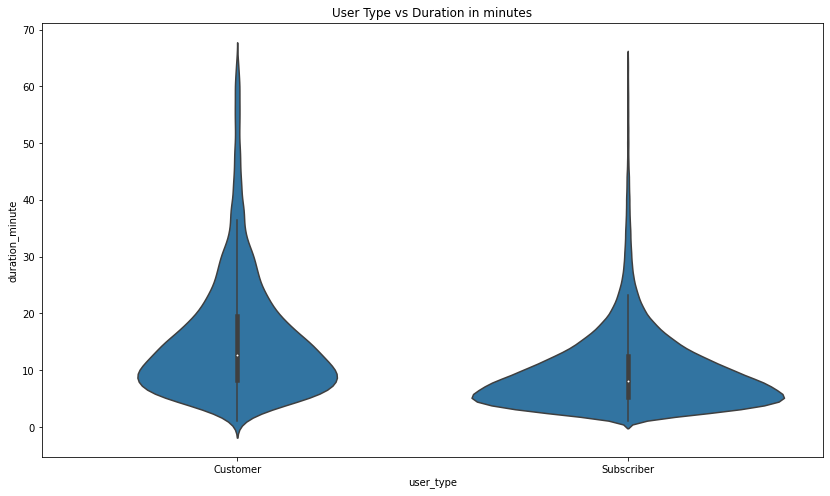

In [21]:
df = df.query('duration_minute <= 65')
sb.violinplot(data=df, x='user_type', y='duration_minute', color=base_color);
plt.title('User Type vs Duration in minutes');

- Subscribers are using the system in a wide manner. i Think most of them made the subscribtion in order to use it going to work!
---

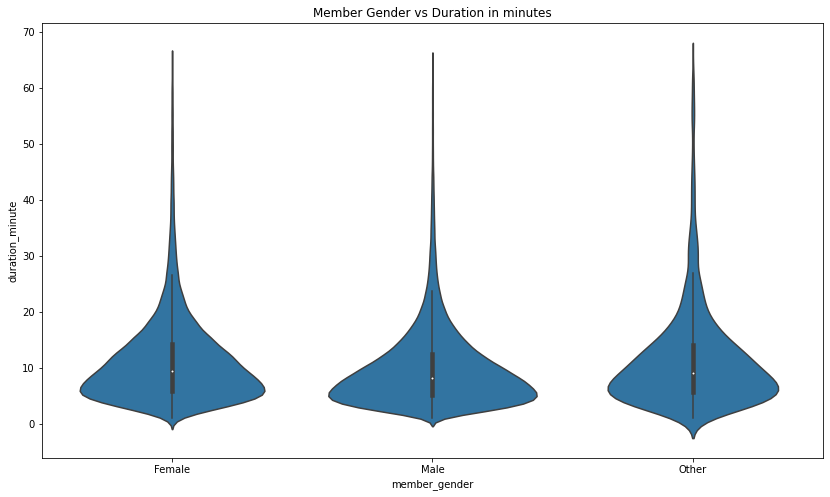

In [22]:
sb.violinplot(data=df, x='member_gender', y='duration_minute', color=base_color);
plt.title('Member Gender vs Duration in minutes');

- Males are using the system more widely.

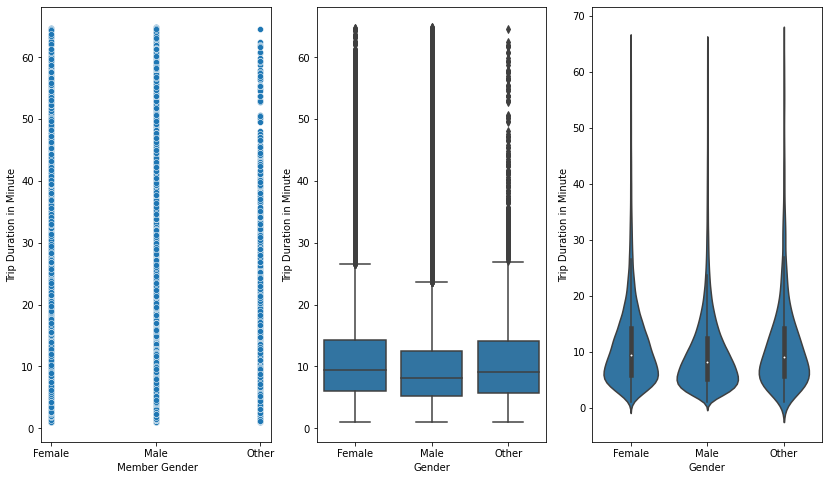

In [23]:
plt.subplot(1,3,1)
sb.scatterplot(data=df, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel(' Member Gender');
plt.ylabel('Trip Duration in Minute');

plt.subplot(1,3,2)
sb.boxplot(data=df, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

plt.subplot(1,3,3)
sb.violinplot(data=df, x='member_gender', y='duration_minute', color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minute');

Text(0.5, 1.0, 'Trip Duration Vs. Start Days')

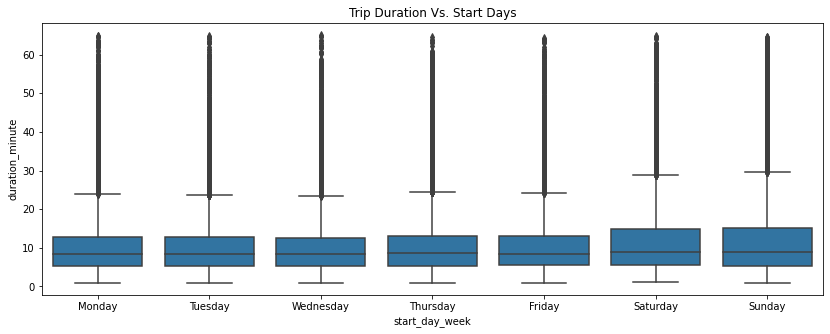

In [24]:
plt.figure(figsize=[14, 5]);
sb.boxplot(data=df, x= 'start_day_week', y = 'duration_minute', color=base_color)
plt.title('Trip Duration Vs. Start Days')

- Saturdays and Sundays have the longest duration!

---

###### 2.3 Multvariate Visualization:

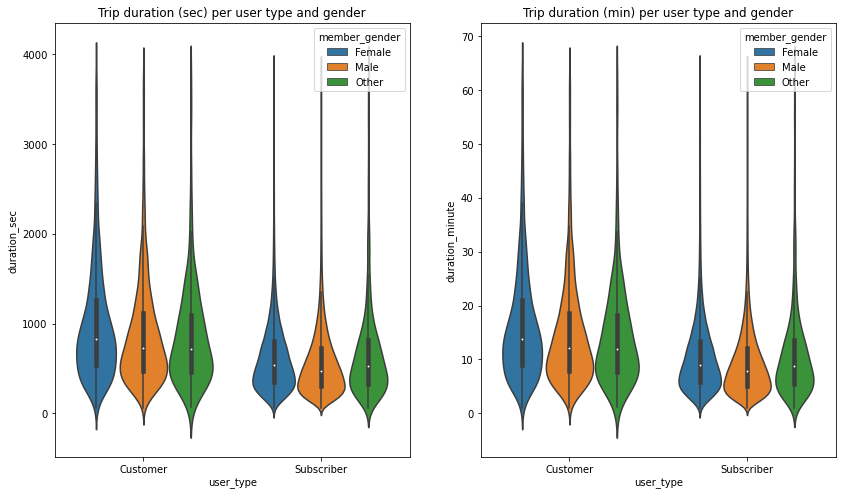

In [25]:
plt.subplot(1,2,1)
sb.violinplot(data=df, x='user_type', y="duration_sec", hue="member_gender")
plt.title('Trip duration (sec) per user type and gender');

plt.subplot(1,2,2)
sb.violinplot(data=df, x='user_type', y="duration_minute", hue="member_gender")
plt.title('Trip duration (min) per user type and gender');

- Females are Taking Longer Trips than males and others!

---

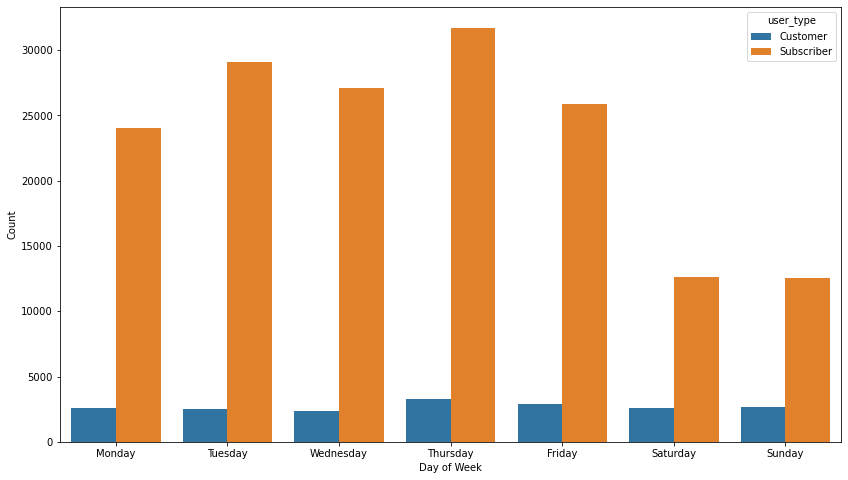

In [26]:
sb.countplot(data=df, x='start_day_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

- it seems like Thursday and Tuesday has the most time of usage for subscribers!
- it seems like Thursday and Friday has the most time of usage for Customers, may be using for touring or having fun!

---


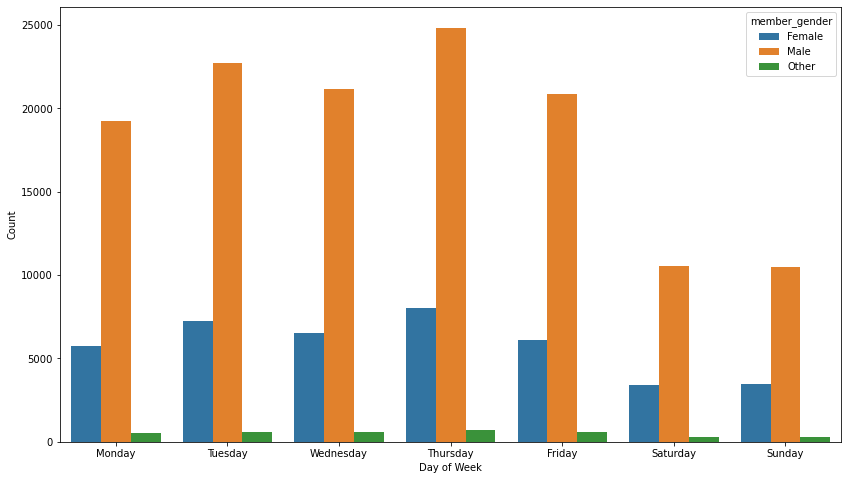

In [27]:
sb.countplot(data=df, x='start_day_week', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Count');

- males are using the system more in Thursday and Tuesday.
- males are using the system more in Thursday and Tuesday.
- Others are using the system more in Thursday.

---

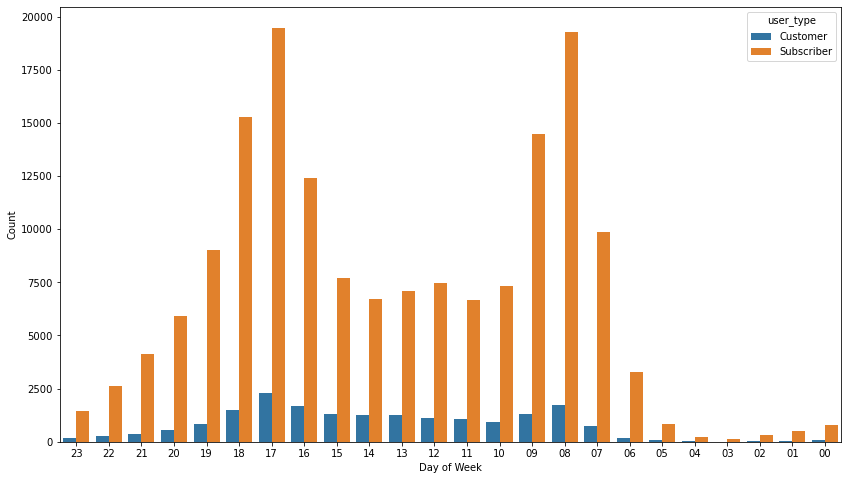

In [28]:
sb.countplot(data=df, x='start_hour_day', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

- Subscribers use the system more between 17-8, and also customers

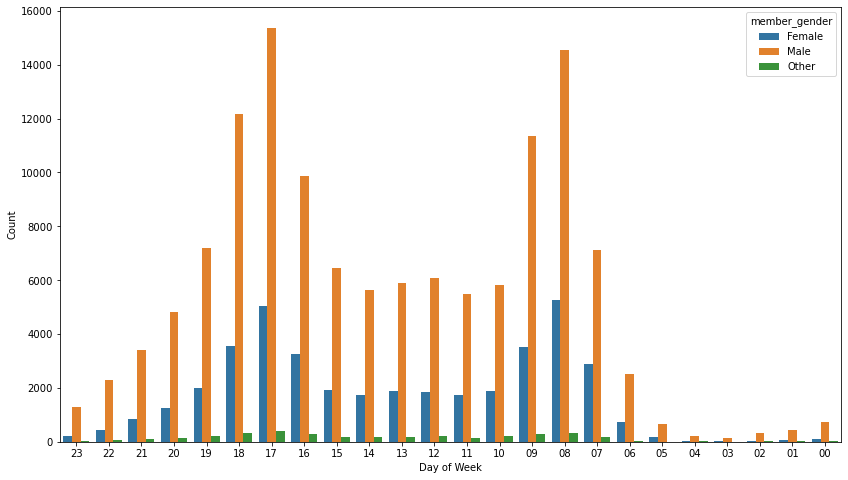

In [29]:
sb.countplot(data=df, x='start_hour_day', hue='member_gender');
plt.xlabel('Day of Week');
plt.ylabel('Count');

--------------



#### INSIGHTS:
- it Appears that males have the dominant ratio of the Members Gender for the users of the Bike Sharing System
- people who are 33 years old are using the system more than any one else!
- Subscribers are the most users of the system!
- Most users are registering on the system between 8 AM and 5 PM, Who is using the system by then?
- Thursday is the most day that the system starts its work at!
- The Visualization shows that most member are using the system from 0 to 200 minutes more than else!
- Subscribers are using the system in a wide manner. i Think most of them made the subscribtion in order to use it going to work!
- Males are using the system more widely.
- Saturdays and Sundays have the longest duration!
- Females are Taking Longer Trips than males and others!
- it seems like Thursday and Tuesday has the most time of usage for subscribers!
- it seems like Thursday and Friday has the most time of usage for Customers, may be using for touring or having fun!
- males are using the system more in Thursday and Tuesday.
- males are using the system more in Thursday and Tuesday.
- Others are using the system more in Thursday.
- Subscribers use the system more between 17-8, and also customers 